# PCA_python

In [1]:
import numpy as np
import pandas as pd

## DATA_load

In [2]:
data=pd.read_csv("airbnb.csv")

In [3]:
data.head(5)

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,NaN,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,NaN,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,NaN,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.0,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.5,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103


In [4]:
data.overall_satisfaction=data.overall_satisfaction.fillna(2.0)
data.head(5)

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,2.0,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,2.0,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,2.0,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.0,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.5,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103


### Split feature

In [6]:
data_pca=data[['overall_satisfaction','reviews','accommodates','price','bedrooms']]
data_pca.head(5)

,overall_satisfaction,reviews,accommodates,price,bedrooms
0,2.0,1,4,119.0,2.0
1,2.0,0,2,600.0,1.0
2,2.0,2,2,96.0,1.0
3,5.0,13,2,55.0,1.0
4,4.5,13,5,276.0,2.0


### X feature & Y label 

In [7]:
X= data_pca[['reviews','accommodates','price','bedrooms']]

In [8]:
X.head(5)

,reviews,accommodates,price,bedrooms
0,1,4,119.0,2.0
1,0,2,600.0,1.0
2,2,2,96.0,1.0
3,13,2,55.0,1.0
4,13,5,276.0,2.0


In [10]:
Y = data_pca[['overall_satisfaction']]

In [11]:
Y.head(5)

,overall_satisfaction
0,2.0
1,2.0
2,2.0
3,5.0
4,4.5


In [12]:
X["price"] = X["price"].fillna(0.0).astype(int)
X["bedrooms"] =X["bedrooms"].fillna(0.0).astype(int)

C:\Users\YOONHOI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\YOONHOI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## rescaling feature vectors

In [13]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [15]:
x_std

array([[-0.48815702,  0.55210687, -0.3601678 ,  0.98345053],
       [-0.51939122, -0.57973812,  2.73670708, -0.32715028],
       [-0.45692282, -0.57973812, -0.50825121, -0.32715028],
       ...,
       [ 4.72795363, -0.01381562, -0.83661009, -0.32715028],
       [-0.51939122, -0.01381562, -0.772226  , -0.32715028],
       [ 1.54206569, -1.14566062, -0.83661009, -0.32715028]])

## Convariance Matrix 

In [16]:
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00030525 -0.0133775  -0.11256247 -0.04628947]
 [-0.0133775   1.00030525  0.41564838  0.74351662]
 [-0.11256247  0.41564838  1.00030525  0.36912337]
 [-0.04628947  0.74351662  0.36912337  1.00030525]]


## Eigen Vectors and Eigen Values

In [17]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [18]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.08602945  0.96531729  0.24324305  0.0399286 ]
 [ 0.62508961  0.15017579 -0.25641705 -0.72177594]
 [ 0.47372709 -0.17728563  0.85996863  0.06787044]
 [ 0.61436516  0.11907803 -0.36815359  0.68763275]]


In [19]:
eig_vecs.T[0]

array([-0.08602945,  0.62508961,  0.47372709,  0.61436516])

In [89]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.04790779 1.01318669 0.68651071 0.25361581]


## 적당한 값 구하기

In [90]:
(eig_vals[0]) / sum(eig_vals)

0.5118207150435024

In [91]:
(eig_vals[0] + eig_vals[1]) / sum(eig_vals)

0.7650400913151915

## 백터위에 점 올려두기

In [101]:
projected_X = x_std.dot((eig_vecs.T[0]))
projected_X2= x_std.dot((eig_vecs.T[1]))# progected

In [102]:
projected_X

array([ 0.82068865,  0.77775722, -0.76484156, ..., -1.01269384,
       -0.53076717, -1.4461182 ])

In [103]:
projected_X2

array([-0.2073534 , -1.11257519, -0.4769889 , ...,  4.67126312,
       -0.40550393,  1.42589471])

In [105]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['PC2'] = projected_X2
result['label'] = Y

In [106]:
result.head(5)

,PC1,PC2,label
0,0.820689,-0.207353,2.0
1,0.777757,-1.112575,2.0
2,-0.764842,-0.476989,2.0
3,-0.919451,-0.098530,5.0
4,1.621054,0.060240,4.5


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'PCA result')

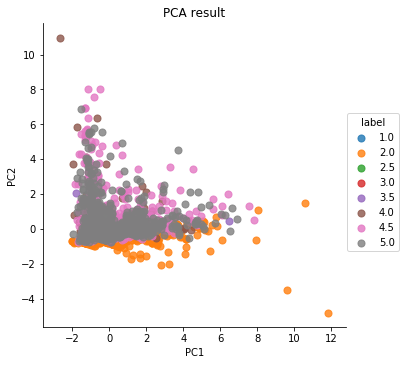

In [107]:
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

## sklearn PCA

In [72]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)

In [78]:
sklearn_pca_x.shape

(3277, 2)

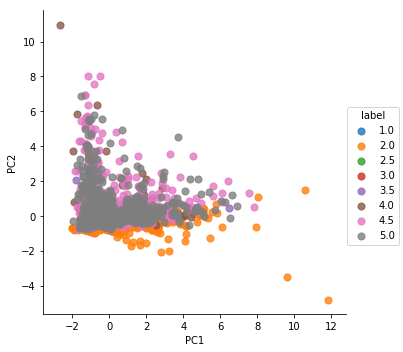

In [79]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1','PC2'])
sklearn_result['label'] = Y

sns.lmplot('PC1', 'PC2', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [80]:
sklearn_result

,PC1,PC2,label
0,0.820689,-0.207353,2.0
1,0.777757,-1.112575,2.0
2,-0.764842,-0.476989,2.0
3,-0.919451,-0.098530,5.0
4,1.621054,0.060240,4.5
5,1.546137,1.112433,3.5
6,-1.392763,-0.670247,5.0
7,-1.207771,-0.586894,2.0
8,2.550376,-0.608144,2.0
9,-0.690556,0.806750,4.5


In [81]:
pca.explained_variance_ratio_

array([0.51182072, 0.25321938])

In [82]:
pca.explained_variance_

array([2.04790779, 1.01318669])

In [84]:
pca.get_covariance()

array([[ 0.98784375, -0.00611522, -0.15725268, -0.0209636 ],
       [-0.00611522,  1.09883447,  0.45277417,  0.61565729],
       [-0.15725268,  0.45277417,  0.84122944,  0.44775234],
       [-0.0209636 ,  0.61565729,  0.44775234,  1.07331335]])

In [95]:
pca2 = decomposition.PCA(0.75)
sklearn_pca_x2 = pca2.fit_transform(x_std)

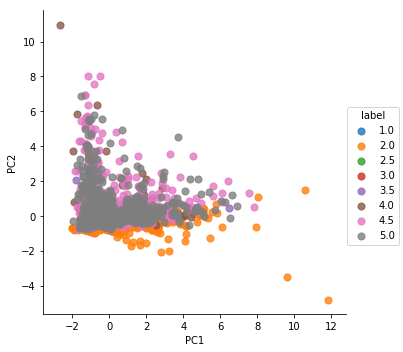

In [96]:
sklearn_result2 = pd.DataFrame(sklearn_pca_x2, columns=['PC1','PC2'])
sklearn_result2['label'] = Y

sns.lmplot('PC1', 'PC2', data=sklearn_result2, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [98]:
pca2.get_covariance()

array([[ 0.98784375, -0.00611522, -0.15725268, -0.0209636 ],
       [-0.00611522,  1.09883447,  0.45277417,  0.61565729],
       [-0.15725268,  0.45277417,  0.84122944,  0.44775234],
       [-0.0209636 ,  0.61565729,  0.44775234,  1.07331335]])

In [100]:
pca2.explained_variance_ratio_

array([0.51182072, 0.25321938])

In [109]:
pca3 = decomposition.PCA(n_components=1)
sklearn_pca_x3 = pca3.fit_transform(x_std)

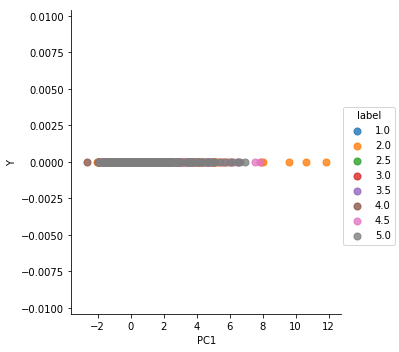

In [110]:
sklearn_result3 = pd.DataFrame(sklearn_pca_x3, columns=['PC1'])
sklearn_result3["Y"]=0.0
sklearn_result3['label'] = Y

sns.lmplot('PC1', 'Y', data=sklearn_result3, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [114]:
pca3.explained_variance_ratio_.sum()

0.5118207150435014